In [1]:
#Importing necessary libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns

warnings.filterwarnings("ignore")

from numpy import datetime64
from wordcloud import WordCloud
import plotly.graph_objects as go
import plotly.express as px

%matplotlib inline


In [2]:
# Importing the dataset
df=pd.read_csv(r'C:\Users\Rishabh\Downloads\startup_funding.csv')

In [3]:
df.head()

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/04/2020,Vedantu,EduTech,Online Tutoring,Bengaluru,Legend Capital,Series C1,12560000,NaN
1,2,06/04/2020,Swiggy,Online Food Delivery,Online Food Delivery,Bengaluru,"Tencent, Ark Impact, Korea Investment Partners...",Series 1,43000000,NaN
2,3,08/04/2020,Zupee,Gaming,Gaming,Gurugram,"Matrix Partners India, Falcon Edge Capital, We...",Series A,8000000,NaN
3,4,07/04/2020,DeHaat,AgriTech,AgriTech,Patna,"Sequoia Capital India, FMO, Omnivore and AgFu...",Series A,12000000,NaN
4,5,15/04/2020,BigBasket,E-commerce,Online Grocery Delivery,Bengaluru,Alibaba Group,Debt Financing,50000000,NaN


In [4]:
#Checking basic information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3077 entries, 0 to 3076
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Sr No              3077 non-null   int64 
 1   Date dd/mm/yyyy    3077 non-null   object
 2   Startup Name       3077 non-null   object
 3   Industry Vertical  2906 non-null   object
 4   SubVertical        2141 non-null   object
 5   City  Location     2897 non-null   object
 6   Investors Name     3053 non-null   object
 7   InvestmentnType    3073 non-null   object
 8   Amount in USD      2110 non-null   object
 9   Remarks            419 non-null    object
dtypes: int64(1), object(9)
memory usage: 240.5+ KB


In [5]:
#Checking for missing Data
df.isnull().sum().sort_values(ascending=False) * 100/len(df)

Remarks              86.382840
Amount in USD        31.426714
SubVertical          30.419240
City  Location        5.849854
Industry Vertical     5.557361
Investors Name        0.779981
InvestmentnType       0.129997
Startup Name          0.000000
Date dd/mm/yyyy       0.000000
Sr No                 0.000000
dtype: float64

#### The column 'Remarks' has extremely low level of useful data
Hence due to the high amount of null values we can delete the column 

In [6]:
del df['Remarks']

In [7]:
#Dealing with Null values
df['na_val']= df.isnull().sum(axis=1)

In [8]:
#Renaming columns
df= df.rename(columns={"Date dd/mm/yyyy": "date","Sr No": "sr_no", "Startup Name": "name", "Industry Vertical": "vertical", "SubVertical": "subvertical", "City  Location": "city", "Investors Name": "investor", "InvestmentnType": "round", "Amount in USD": "amount"}).set_index('sr_no')
df.head()

,date,name,vertical,subvertical,city,investor,round,amount,na_val
sr_no,,,,,,,,,
1,09/04/2020,Vedantu,EduTech,Online Tutoring,Bengaluru,Legend Capital,Series C1,12560000,0
2,06/04/2020,Swiggy,Online Food Delivery,Online Food Delivery,Bengaluru,"Tencent, Ark Impact, Korea Investment Partners...",Series 1,43000000,0
3,08/04/2020,Zupee,Gaming,Gaming,Gurugram,"Matrix Partners India, Falcon Edge Capital, We...",Series A,8000000,0
4,07/04/2020,DeHaat,AgriTech,AgriTech,Patna,"Sequoia Capital India, FMO, Omnivore and AgFu...",Series A,12000000,0
5,15/04/2020,BigBasket,E-commerce,Online Grocery Delivery,Bengaluru,Alibaba Group,Debt Financing,50000000,0


In [9]:
#Removing columns with incomplete data
int_ln= df.shape[0]
df.drop(df.loc[df['na_val']>3].index, inplace= True)
(int_ln-df.shape[0])*100/int_ln

1.2999675008124796

Removed 1.3 % of the null values

In [10]:
#Examining distribution of Null Values
print(df.na_val.sum())
df.isnull().sum()

2122


date             0
name             0
vertical       131
subvertical    896
city           140
investor        24
round            4
amount         927
na_val           0
dtype: int64

## Data Cleaning

In [11]:
df[['name', 'vertical', 'subvertical', 'amount']]=df[['name', 'vertical', 'subvertical', 'amount']].replace(to_replace =',', value = '', regex = True)
df.replace(to_replace ='\+', value = '', regex = True, inplace= True)
df.replace(to_replace =r'\\\\xc2\\\\xa0', value = '', regex = True, inplace= True)
df.replace(to_replace =r'\\\\Xc2\\\\Xa0', value = '', regex = True, inplace= True)
df.replace(to_replace ='N/A', value = np.nan, regex = True, inplace= True)
df.replace(to_replace ='.com$', value = '', regex = True, inplace= True)
df.replace(to_replace ='Bangalore', value = 'Bengaluru', regex = True, inplace= True)
df.head()

,date,name,vertical,subvertical,city,investor,round,amount,na_val
sr_no,,,,,,,,,
1,09/04/2020,Vedantu,EduTech,Online Tutoring,Bengaluru,Legend Capital,Series C1,12560000,0
2,06/04/2020,Swiggy,Online Food Delivery,Online Food Delivery,Bengaluru,"Tencent, Ark Impact, Korea Investment Partners...",Series 1,43000000,0
3,08/04/2020,Zupee,Gaming,Gaming,Gurugram,"Matrix Partners India, Falcon Edge Capital, We...",Series A,8000000,0
4,07/04/2020,DeHaat,AgriTech,AgriTech,Patna,"Sequoia Capital India, FMO, Omnivore and AgFu...",Series A,12000000,0
5,15/04/2020,BigBasket,E-commerce,Online Grocery Delivery,Bengaluru,Alibaba Group,Debt Financing,50000000,0


In [12]:
df['city'].replace(to_replace =['Ahemdabad', 'Ahmedabad'], value = 'Ahemadabad', inplace= True)
df['city'].replace(to_replace =['Bhubneswar'], value = 'Bhubaneswar', inplace= True)
df['city'].replace(to_replace =['Usa/India','Us/India', 'Us'], value = 'Usa', inplace= True)
df['city'].replace(to_replace =['Kolkatta'], value = 'Kolkata', inplace= True)
df['city'].replace(to_replace =['Kormangala'], value = 'Bengaluru', inplace= True)
df['city'].replace(to_replace =['Andheri', 'Chembur'], value = 'Mumbai', inplace= True)
df['city'].replace(to_replace =['Boston', 'Burnsville', 'California', 'Menlo Park', 'Palo Alto', 'New York'], value = 'Usa', inplace= True)
df['city'].replace(to_replace =['Panaji'], value = 'Goa', inplace= True)

df.loc[df.city.str.contains('Bengaluru', regex=True, na=False), 'city']= 'Bengaluru'
df.loc[df.city.str.contains('Chennai', regex=True, na=False), 'city']= 'Chennai'
df.loc[df.city.str.contains('Delhi', regex=True, na=False), 'city']= 'Delhi'
df.loc[df.city.str.contains('Mumbai', regex=True, na=False), 'city']= 'Mumbai'
df.loc[df.city.str.contains('Pune', regex=True, na=False), 'city']= 'Pune'
df.loc[df.city.str.contains('Noida', regex=True, na=False), 'city']= 'Noida'
df.loc[df.city.str.contains('Gurgaon|Gurugram', regex=True, na=False), 'city']= 'Gurgaon'
df.loc[df.city.str.contains('Goa', regex=True, na=False), 'city']= 'Goa'
df.loc[df.city.str.contains('India', regex=True, na=False), 'city']= 'India'
df.loc[df.city.str.contains('Hyderabad', regex=True, na=False), 'city']= 'Hyderabad'
df.loc[df.city.str.contains('San', regex=True, na=False), 'city']= 'Usa'

df.head()

,date,name,vertical,subvertical,city,investor,round,amount,na_val
sr_no,,,,,,,,,
1,09/04/2020,Vedantu,EduTech,Online Tutoring,Bengaluru,Legend Capital,Series C1,12560000,0
2,06/04/2020,Swiggy,Online Food Delivery,Online Food Delivery,Bengaluru,"Tencent, Ark Impact, Korea Investment Partners...",Series 1,43000000,0
3,08/04/2020,Zupee,Gaming,Gaming,Gurgaon,"Matrix Partners India, Falcon Edge Capital, We...",Series A,8000000,0
4,07/04/2020,DeHaat,AgriTech,AgriTech,Patna,"Sequoia Capital India, FMO, Omnivore and AgFu...",Series A,12000000,0
5,15/04/2020,BigBasket,E-commerce,Online Grocery Delivery,Bengaluru,Alibaba Group,Debt Financing,50000000,0


In [13]:
df['vertical']= df['vertical'].replace(to_replace ='-', value = '', regex = True)
for col in df.columns[1:5]:
    df[col]= df[col].str.title()


df['vertical'].replace(to_replace ='Edtech', value = 'Education', inplace= True)
df['vertical'].replace(to_replace ='Edutech', value = 'Education', inplace= True)

df.loc[df.vertical.str.contains('Food|Dining|Restaurant', regex=True, na=False), 'vertical']= 'Food'
df.loc[df.vertical.str.contains('Education|Exam', regex=True, na=False), 'vertical']= 'Education'
df.loc[df.vertical.str.contains('commerce|Marketplace', regex=True, na=False), 'vertical']= 'Ecommerce'
df.loc[df.vertical.str.contains('Health|Doctor', regex=True, na=False), 'vertical']= 'Healthcare'
df.loc[df.vertical.str.contains('Fin', regex=True, na=False), 'vertical']= 'Finance'
df.loc[df.vertical.str.contains('Hotel|Resort', regex=True, na=False), 'vertical']= 'Hospitality'
df.loc[df.vertical.str.contains('Transport', regex=True, na=False), 'vertical']= 'Transportation'
df.loc[df.vertical.str.contains('Logistics', regex=True, na=False), 'vertical']= 'Logistics'
df.loc[df.vertical.str.contains('Delivery', regex=True, na=False), 'vertical']= 'Delivery'
df.loc[df.vertical.str.contains('Hiring|Job', regex=True, na=False), 'vertical']= 'Job Platform'
df.loc[df.vertical.str.contains('Rent', regex=False, na=False), 'vertical']= 'Rental Services'
df.loc[df.vertical.str.contains('Analytics', regex=True, na=False), 'vertical']= 'Analytics Platform'
df.loc[df.vertical.str.contains('It', regex=True, na=False), 'vertical']= 'Information Technology'
df.loc[df.vertical.str.contains('Gam', regex=True, na=False), 'vertical']= 'Gaming'
df.loc[df.vertical.str.contains('Hyperlocal', regex=True, na=False), 'vertical']= 'Hyperlocal Services'



In [14]:
df.loc[df['round'].str.contains('Angel', regex=True, na=False), 'round']= 'Angel Funding'
df.loc[df['round'].str.contains('Crowd', regex=True, na=False), 'round']= 'Crowd Funding'
df.loc[df['round'].str.contains('Debt', regex=True, na=False), 'round']= 'Debt Funding'
df.loc[df['round'].str.contains('Private', regex=True, na=False), 'round']= 'Private Funding'
df.loc[df['round'].str.contains('Series|series', regex=True, na=False), 'round']= 'Series Funding'
df.loc[df['round'].str.contains('Seed', regex=True, na=False), 'round']= 'Seed Funding'
df.loc[df['round'].str.contains('Equity', regex=True, na=False), 'round']= 'Equity Based Funding'
df.loc[df['round'].str.contains('Series', regex=True, na=False), 'round']= 'Series Funding'
df.loc[df['round'].str.contains('Series', regex=True, na=False), 'round']= 'Series Funding'


In [15]:
df['investor']=df['investor'].str.title()
df.loc[df['investor']== 'Undisclosed Investor', 'investor']= 'Undisclosed Investors'

`

In [16]:
#Changing Datatype of date column to datetime
df['date']= pd.to_datetime(df['date'], dayfirst=True) 
df.sort_values(by= 'date', ascending= False).head()


,date,name,vertical,subvertical,city,investor,round,amount,na_val
sr_no,,,,,,,,,
5,2020-04-15,Bigbasket,Ecommerce,Online Grocery Delivery,Bengaluru,Alibaba Group,Debt Funding,50000000,0
1,2020-04-09,Vedantu,Education,Online Tutoring,Bengaluru,Legend Capital,Series Funding,12560000,0
6,2020-04-08,Fingerlix,Food,Ready-To-Cook Food,Mumbai,"Accel, Zephyr Peacock, Swiggy, And Rb Investments",Series Funding,1800000,0
3,2020-04-08,Zupee,Gaming,Gaming,Gurgaon,"Matrix Partners India, Falcon Edge Capital, We...",Series Funding,8000000,0
4,2020-04-07,Dehaat,Agritech,Agritech,Patna,"Sequoia Capital India, Fmo, Omnivore And Agfu...",Series Funding,12000000,0


In [17]:
#Labelling Unknown data as Nan value
df.loc[df['amount']=='undisclosed']=np.nan
df.loc[df['amount']=='unknown']=np.nan
df.loc[df['amount']=='Undisclosed']=np.nan
df.loc[df['amount']=='Unknown']=np.nan


In [18]:
#Copying rows which do not have null value in the amount column to dataframe amt
#Changing Datatype of amount column to float in amt
amt= df[df.amount.notnull()]
amt.amount= amt.amount.astype('float')
amt.head()

,date,name,vertical,subvertical,city,investor,round,amount,na_val
sr_no,,,,,,,,,
1,2020-04-09,Vedantu,Education,Online Tutoring,Bengaluru,Legend Capital,Series Funding,12560000.0,0.0
2,2020-04-06,Swiggy,Food,Online Food Delivery,Bengaluru,"Tencent, Ark Impact, Korea Investment Partners...",Series Funding,43000000.0,0.0
3,2020-04-08,Zupee,Gaming,Gaming,Gurgaon,"Matrix Partners India, Falcon Edge Capital, We...",Series Funding,8000000.0,0.0
4,2020-04-07,Dehaat,Agritech,Agritech,Patna,"Sequoia Capital India, Fmo, Omnivore And Agfu...",Series Funding,12000000.0,0.0
5,2020-04-15,Bigbasket,Ecommerce,Online Grocery Delivery,Bengaluru,Alibaba Group,Debt Funding,50000000.0,0.0


In [19]:
#Examining Highest investments per Startup
nm_am= amt.copy()[['name','amount']]

nm_am= nm_am.groupby('name').sum().sort_values('amount', ascending= False)
nm_am.head()

,amount
name,
Flipkart,4.759700e+09
Rapido Bike Taxi,3.900000e+09
Paytm,3.148950e+09
Ola Cabs,2.054200e+09
Udaan,8.700000e+08


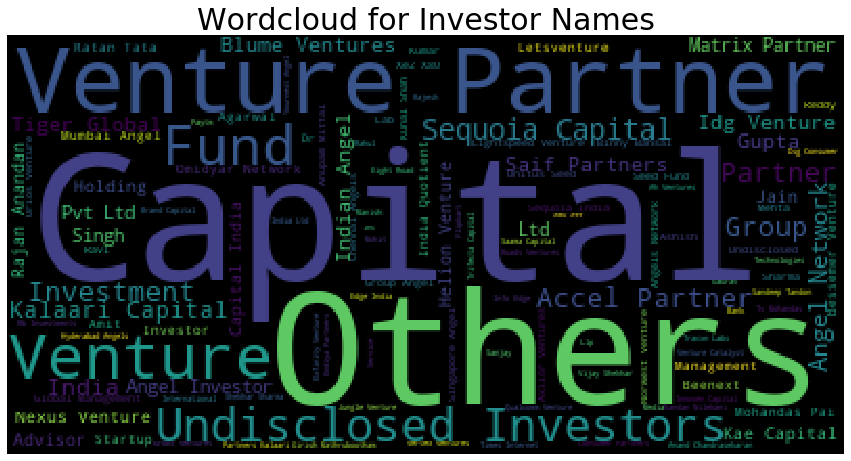

In [20]:
#Looking at Investor who have invested in more Startups
names = df["investor"][~pd.isnull(df["investor"])]
# print(names)
wordcloud = WordCloud().generate(' '.join(names))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.title("Wordcloud for Investor Names", fontsize=30)
plt.axis("off")
plt.show()


In [21]:
#Joining all investors name and cleaning the list
invnames= ', '.join(names).strip('and')
invnames=invnames.strip()

In [22]:
invn= invnames.split(',')
print(len(invn))
len(set(invn))
# set(invn)

5775


3195

5775 investments were made since 2015, by 3195 unique investors

Text(0.5, 1.0, 'Investors Names with number of funding')

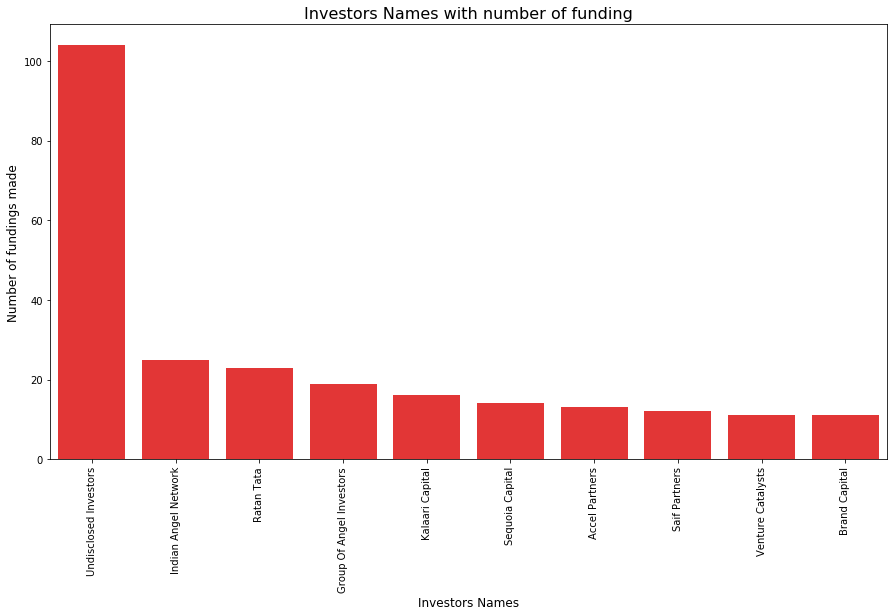

In [23]:
investors = df['investor'].dropna().value_counts().head(10)
#print(investors)
plt.figure(figsize=(15,8))
sns.barplot(investors.index, investors.values, alpha=0.9, color='red')
plt.xticks(rotation='vertical')
plt.xlabel('Investors Names', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Investors Names with number of funding", fontsize=16)


Key takeaways
1. A high number of Investors are Undisclosed
2. The most number of investments done by a single Investor/group is by the Indian Angel Network
3. The highest count for investments done by a single investor is of Ratan Tata

In [26]:
df['name'].nunique()

2311

The number of Unique startups is 2311

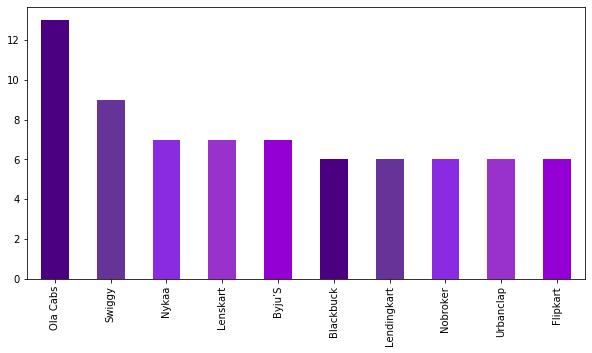

In [27]:
clrs= ['indigo','rebeccapurple', 'blueviolet', 'darkorchid', 'darkviolet']
df['name'].value_counts()[:10].plot.bar(figsize=(10,5), color= clrs)
plt.show()


Startups thought to be most attractive by Investors
i.e. Startups with high count of Investors

In [109]:
df['vertical'].value_counts()[:10].reset_index()

,index,vertical
0,Consumer Internet,942
1,Technology,478
2,Ecommerce,420
3,Healthcare,107
4,Food,98
5,Finance,96
6,Education,69
7,Logistics,63
8,Rental Services,23
9,Hospitality,17


In [24]:
df.shape

(3037, 9)

# City wise distribution
Looking at distribution of Startups according to location

In [28]:
a=pd.get_dummies(df['city']).sum().sort_values(ascending= False)
a.head()

Bengaluru    866
Mumbai       579
Delhi        467
Gurgaon      342
Pune         115
dtype: int64

In [29]:
fig = go.Figure()

fig.add_trace(go.Bar(
    y=a.index,
    x=a,
    name='City Wise Distribution',
                orientation='h'))

fig.show()

Bengaluru has the highest number of Startups(866), followed closely by Mumbai(579) and Delhi(467)

# Industry wise distribution
Looking at the distribution of Startups according to the Vertical they belong to

In [33]:
a=pd.get_dummies(df['vertical']).sum().sort_values(ascending= False)
a= pd.DataFrame(a).reset_index().rename(columns= {'index': 'industry', 0:'count'})
a.loc[a.industry.str.contains('Food', regex=False), 'industry']= 'Food'
#Verticals which have less than 3 startups have been grouped together under Miscellaneous
a.loc[a['count'] < 3, 'industry']='Misc'

In [34]:
fig = go.Figure(data=[go.Pie(labels=a.industry, values=a['count'])])
fig.show()

32.5% of startups belong to the cateegory 'Consumer Internet'  
16.5% of startups have their vertical as 'Technology'  
14.5% of startups work in the field of 'E-Commerce'  
3.7% of startups work in 'Healthcare'  

In [36]:
fig = go.Figure()

fig.add_trace(go.Bar(
    y=a['industry'][:15],
    x=a['count'][:15],
    name='Sector Wise Distribution',
                orientation='h'))

fig.show()

There were 942 funded startups working in the category 'Consumer Internet'  
There were 478 funded startups working in the category 'Technology'  
There were 420 funded startups working in the category 'E-Commerce'  
There were 107 funded startups working in the category 'Healthcare'  
There were 98 funded startups working in the category 'Food'  
There were 96 funded startups working in the category 'Finance'  

## Investment type 

In [38]:
a=pd.get_dummies(df['round']).sum().sort_values(ascending= False)
a= pd.DataFrame(a).reset_index().rename(columns= {'index': 'type', 0:'count'})
# a.loc[a['indus'.str.contains('Food', regex=False), 'industry']= 'Food'
a.loc[a['count'] < 10, 'type']='Others'
fig = go.Figure(data=[go.Pie(labels=a.type, values=a['count'])])
fig.show()
# df['round'].value_counts().plot(kind='pie', legend= True)


45.7% (1382) of Startups were funded through seed funding.  
44.5% (1348) of Startups were funded through private funding.  
4.73% (143) of Startups were funded through angel funding.  
About 1.02% (31) startups were funded through debt financing  
Only 3.57% (108) of Startups could reach series funding rounds.  

Looking at highest individual Investments

In [46]:
amt.sort_values(by= 'amount', ascending= False).head()

,date,name,vertical,subvertical,city,investor,round,amount,na_val
sr_no,,,,,,,,,
94,2019-08-27,Rapido Bike Taxi,Transportation,Bike Taxi,Bengaluru,Westbridge Capital,Series Funding,3.900000e+09,0.0
685,2017-08-11,Flipkart,Ecommerce,Online Marketplace,Bengaluru,Softbank,Private Funding,2.500000e+09,0.0
1000,2017-03-21,Flipkart,Ecommerce,Ecommerce Marketplace,Bengaluru,"Microsoft, Ebay, Tencent Holdings",Private Funding,1.400000e+09,0.0
864,2017-05-18,Paytm,Ecommerce,Mobile Wallet & Ecommerce Platform,Bengaluru,Softbank Group,Private Funding,1.400000e+09,0.0
65,2019-11-25,Paytm,Finance,Mobile Wallet,Noida,Vijay Shekhar Sharma,Funding Round,1.000000e+09,0.0


Rapido Bike Taxi has recieved the highest funding at any particular time of 3.9 billion dollars

In [52]:
df.loc[df['name'] == 'Flipkart'].amount

sr_no
807       71000000
2682     700000000
2723      50000000
1066      38700000
685     2500000000
1000    1400000000
Name: amount, dtype: object

In [53]:
df.loc[df['name'] == 'Ola Cabs']

,date,name,vertical,subvertical,city,investor,round,amount,na_val
sr_no,,,,,,,,,
604,2017-10-28,Ola Cabs,Consumer Internet,App Based Cab Hailing Services,Bengaluru,Ani Technologies Pvt. Ltd,Private Funding,7700000,0.0
2278,2015-11-18,Ola Cabs,Car Aggregator & Retail Mobile App,NaN,Bengaluru,"Baillie Gifford, Falcon Edge Capital, Tiger Gl...",Private Funding,500000000,1.0
782,2017-06-14,Ola Cabs,Consumer Internet,Cab Aggregation App,Bengaluru,Tekne Capital Management Llc,Private Funding,50000000,0.0
2854,2015-04-08,Ola Cabs,Cab Aggregator,NaN,Bengaluru,"Dst Global, Steadview Capital, Tiger Global, A...",Private Funding,400000000,1.0
687,2017-08-11,Ola Cabs,Consumer Internet,App Based Cab Aggregation Service,Gurgaon,Tekne Capital Management,Private Funding,36000000,0.0
958,2017-03-01,Ola Cabs,Consumer Internet,App Based Cab Aggregator,Bengaluru,Softbank Group Corp,Private Funding,330000000,0.0
2492,2015-09-28,Ola Cabs,Cab Booking App Platform,NaN,Bengaluru,Didi Kuaidi,Private Funding,30000000,1.0
923,2017-04-14,Ola Cabs,Consumer Internet,Cab Aggregator App,Bengaluru,Simi Pacific Pte,Private Funding,260000000,0.0
2449,2015-09-14,Ola Cabs,Rental Services,NaN,Bengaluru,"Falcon Edge Capital, Ny Based Hedge Fund, Tige...",Private Funding,225000000,1.0


## Shows single largest Investment

In [47]:
amt.sort_values('amount', ascending= False, inplace= True)
fig = go.Figure()

fig.add_trace(go.Scatter(
    y=amt.name,
    x=amt.amount,
    name='Distribution',
                orientation='h',
    mode= 'markers'
))

fig.show()

## Highest investments recieved by a startup

In [67]:
amt_nam=amt.copy()[['name', 'amount']].groupby('name').sum().sort_values('amount', ascending= False)

# amt_nam
fig = go.Figure()

fig.add_trace(go.Scatter(
    y=amt_nam.index,
    x=amt_nam.amount,
    name='Distribution',
                orientation='h',
    mode= 'markers'
))

fig.show()

# Amount vs industry

In [72]:
amt_ver=amt.copy()[['vertical', 'amount']].groupby('vertical').sum().sort_values('amount', ascending= False)


In [73]:
fig = go.Figure()

fig.add_trace(go.Bar(
    y=amt_ver.index[:15],
    x=amt_ver.amount[:15],
    name='Sector Wise Distribution',
                orientation='h'))

fig.show()

#                                                   Date

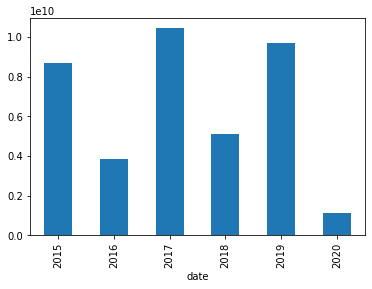

In [74]:
inv_y=amt.groupby(amt['date'].dt.year)
inv_y.amount.sum().plot.bar()

In [75]:
inv_20= amt.loc[df['date'].dt.year == 2020]
inv_20.amount.sum()

1107392274.0

In [76]:
inv_20_m=inv_20.groupby(inv_20['date'].dt.month)
sm=inv_20_m.amount.sum()
fig= go.Figure([go.Bar(y= sm, x=['Jan', 'Feb', 'Mar', 'Apr'])])
fig.show()

In [77]:
inv_m=amt.groupby(amt['date'].dt.month)
sm=inv_m.amount.sum()
fig= go.Figure([go.Bar(y= sm, x=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])])
fig.show()

In [112]:
inv_m=amt.groupby(amt['date'].dt.month)
sm=inv_m.amount.sum().reset_index()
sm['Quarter']=(sm['date']-1)//3
sm.drop('date', axis=1, inplace=True)
sm['Quarter'].replace(to_replace =0, value = 4, regex = True, inplace= True)
q=sm.groupby('Quarter').sum()

fig = px.bar(y=q,x=q.index)
fig.show()

In [79]:
inv_m=amt.groupby(amt['date'].dt.day)
sm=inv_m.amount.sum()
fig = px.bar(y=sm,x=sm.index)
fig.show()


In [80]:
cit_ver=df.copy()[['vertical', 'city','amount']].groupby('vertical').sum().reset_index()#.sort_values('city', ascending= False)
cit_ver.head()

,vertical,city,amount
0,360Degree View Creating Platform,Bengaluru,0
1,3D Printer Manufacturer,Bengaluru,3000000
2,Accounting,Bengaluru,5000000
3,Activity Based Social Network,Chennai,0
4,Advertising,Hyderabad,3000000


Looking at the Trends of number of Funded startups founded along the years across the top verticals

In [81]:
fig = go.Figure()
for vertic in amt_ver.head(6).index:
    temp=amt[amt['vertical']== vertic]['date'].dt.year.reset_index().groupby('date').count().reset_index()
    fig.add_trace(go.Scatter(
    x=temp['date'],
    y=temp['sr_no'],
    name=vertic))
fig.show()

Looking at the amount invested along the years in the top Verticals

In [82]:
fig = go.Figure()
for vertic in amt_ver.head(10).index:
    t= amt[amt['vertical']== vertic][['date', 'amount']]
    t['year']= t['date'].dt.year
    t.reset_index(inplace= True)
    t=t.drop(['sr_no', 'date'], axis= 1).groupby('year').sum().reset_index()
#     temp=amt[amt['vertical']== vertic]['date'].dt.year.reset_index().groupby('date').count().reset_index()
    fig.add_trace(go.Scatter(
    x=t['year'],
    y=t['amount'],
    name=vertic))
fig.show()



In [89]:


temp= amt[amt.vertical.notnull()]

top= amt_ver.head().index

temp['year']= temp['date'].dt.year

t=temp[(temp['vertical'] == top[0])|(temp['vertical'] == top[1])|(temp['vertical'] == top[2])|(temp['vertical'] == top[3])
    |(temp['vertical'] == top[4])]

fig = px.box(t, x="year", y="amount")
fig.update_traces(quartilemethod="exclusive") # or "inclusive", or "linear" by default
fig.show()


In [85]:
temp= amt[amt.vertical.notnull()]


top= amt_ver.head().index

temp['year']= temp['date'].dt.year

temp1= temp[(temp['vertical'] == top[0])|(temp['vertical'] == top[1])|(temp['vertical'] == top[2])|(temp['vertical'] == top[3])
    |(temp['vertical'] == top[4])]


fig = px.box(temp1, x="year", y="amount", color="vertical")
fig.update_traces(quartilemethod="exclusive") # or "inclusive", or "linear" by default
fig.show()

Plotting all investments(individually) according to city and vertical

In [107]:
fig = go.Figure(data=[go.Scatter(
    x=amt['vertical'], y=amt['city'],
    mode='markers',
    marker_size=amt['amount']*1000/amt['amount'].sum())
# )
])

fig.show()


Plotting total investments per city and vertical

In [93]:
#Removing Outliers
iqr= amt.amount.quantile(0.75)-amt.amount.quantile(0.25)
top= amt.amount.quantile(0.75) +1.5* iqr
bot= amt.amount.quantile(0.25) -1.5* iqr
amtqt= amt.loc[(amt['amount'] > bot) & (amt['amount'] < top)]
amtqt= amtqt[['vertical', 'amount', 'city']].groupby(['vertical', 'city']).sum()
amtqt.reset_index(inplace= True)

In [106]:
fig = go.Figure(data=[go.Scatter(
    x=amtqt['vertical'], y=amtqt['city'],
    mode='markers',
    marker_size=amtqt['amount']*1000/amtqt['amount'].sum())
])

fig.update_layout(
    autosize=False,
    width=1000,
    height=1000)

fig.show()
